In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Important disclaimer regarding below plots
After initially plotting the requested data (temperature, mean temp each day, rolling windspeed, etc.) over the course of every year provided for in the dataset (1996 - 2024), I made a decision to go back and change my code to only plot each of the datapoints requested in this assignment over a period of 5 years (randomly selected). I did this because my initial plots, due to the high volume of data, showed no meaningful patterns. Please see below plot as an example.

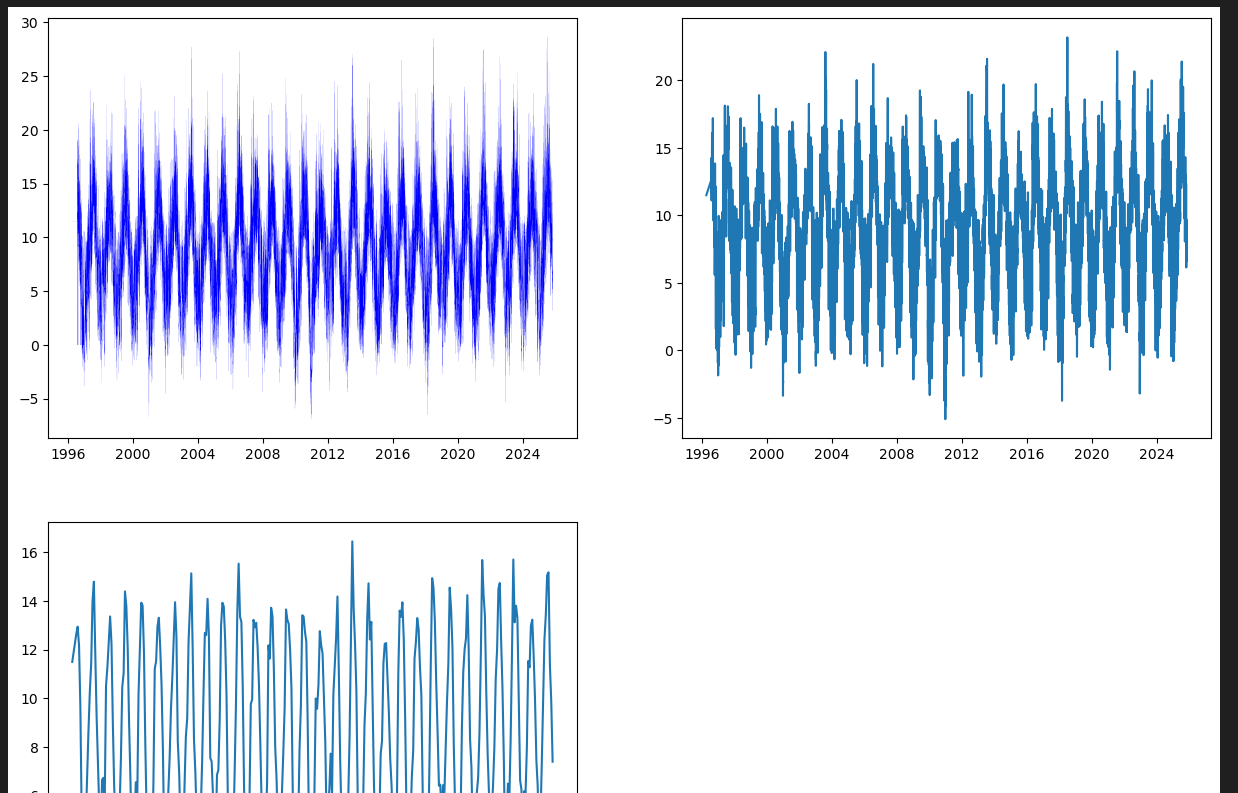

Probably, I should have used an even smaller time frame upon further reflection. But I was happy that the 5 year time frame plots were at lease much clearer than the initial plots, and I left it at that.

In [9]:
url = 'https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv'

df = pd.read_csv(url, skiprows=23, index_col=0)

print(df.head())

                   ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
date                                                                        
10-apr-1996 14:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
31-jul-1996 08:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
31-jul-1996 09:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   
31-jul-1996 10:00    0  0.0      0  12.9      0  11.3    9.8    0.0     0   
31-jul-1996 11:00    0  0.0      0  14.5      0  10.8    7.0    0.0     0   

                      msl  ind.3 wdsp  ind.4 wddir  ww   w  sun    vis clht  \
date                                                                          
10-apr-1996 14:00  1016.7      0    0      0     0  25  81  0.0  35000   32   
31-jul-1996 08:00  1011.4      0    0      0     0  25  82  0.0  40000   45   
31-jul-1996 09:00  1011.4      0    0      0     0  80  81  0.0   8000   32   
31-jul-1996 10:00  1011.2      0    0      0     0  25  82  0.0  

C:\Users\fmtie\AppData\Local\Temp\ipykernel_31224\3746807074.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23, index_col=0)


In [10]:

# further to my opening disclaimer, I first generate a random 5 year period, and then delete any data that does not fall within that time frame
import random
# generating a random integer between 1996, and 5 years back from 2024 (guarenteeing 5 years of data)
start_year = random.randint(1996, 2019)
end_year = start_year + 5
print(f"Selected time frame: {start_year} to {end_year}")

# now deleting any data that doesn't fall within the randomly selected 5 year time frame of 2017 - 2022
# I'm doing this first to make the dataset more manageable for later analysis and plotting, as it each code cell was initially taking a long time to run with the full dataset
# here I use the pd.to_datetime function to convert the date column to a datetime object, then use the dt.year attribute to extract the year from the datetime object for filtering
df.index = pd.to_datetime(df.index)
df_5_year = df[(df.index.year >= start_year) & (df.index.year < end_year)]

# checking that the data frame now only contains data from the randomly generated 5 year period
#print(df_5_year.head())
#print(df_5_year.tail())

# Now I want to extract the time data from the date column and place it in a new column called 'Time'
# I use the pd.to_datetime function to convert the date column to a datetime object
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df_5_year['time'] = pd.to_datetime(df_5_year.index).time
#print(df_5_year.head())

# then create a date only column (as I later realised I might need to keep the column containing both date and time data in addition to creating separate date and time columns)
df_5_year['date_only'] = pd.to_datetime(df_5_year.index).date
print(df_5_year.head())

C:\Users\fmtie\AppData\Local\Temp\ipykernel_31224\3757697155.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


Selected time frame: 2009 to 2014
                     ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
date                                                                          
2009-01-01 00:00:00    3  0.0      0   0.9      0   0.9    0.9    6.5   100   
2009-01-01 01:00:00    3  0.0      0   0.7      0   0.7    0.7    6.4   100   
2009-01-01 02:00:00    3  0.0      0   0.6      0   0.6    0.6    6.4   100   
2009-01-01 03:00:00    3  0.0      0   0.6      0   0.6    0.6    6.4   100   
2009-01-01 04:00:00    3  0.0      0   0.6      0   0.6    0.6    6.4   100   

                        msl  ...  ind.4 wddir  ww   w  sun  vis  clht clamt  \
date                         ...                                              
2009-01-01 00:00:00  1027.3  ...      2   120  44  44  0.0  300     2     8   
2009-01-01 01:00:00  1027.4  ...      2   120  44  44  0.0  300     2     8   
2009-01-01 02:00:00  1027.3  ...      2   110  44  44  0.0  300     2     8   
2009-01-01 03:00:

C:\Users\fmtie\AppData\Local\Temp\ipykernel_31224\3757697155.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_year['time'] = pd.to_datetime(df_5_year.index).time
C:\Users\fmtie\AppData\Local\Temp\ipykernel_31224\3757697155.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_year['date_only'] = pd.to_datetime(df_5_year.index).date


C:\Users\fmtie\AppData\Local\Temp\ipykernel_31224\288438858.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = df_5_year['temp'].groupby(pd.Grouper(freq='M')).mean()


Text(0, 0.5, 'Date')

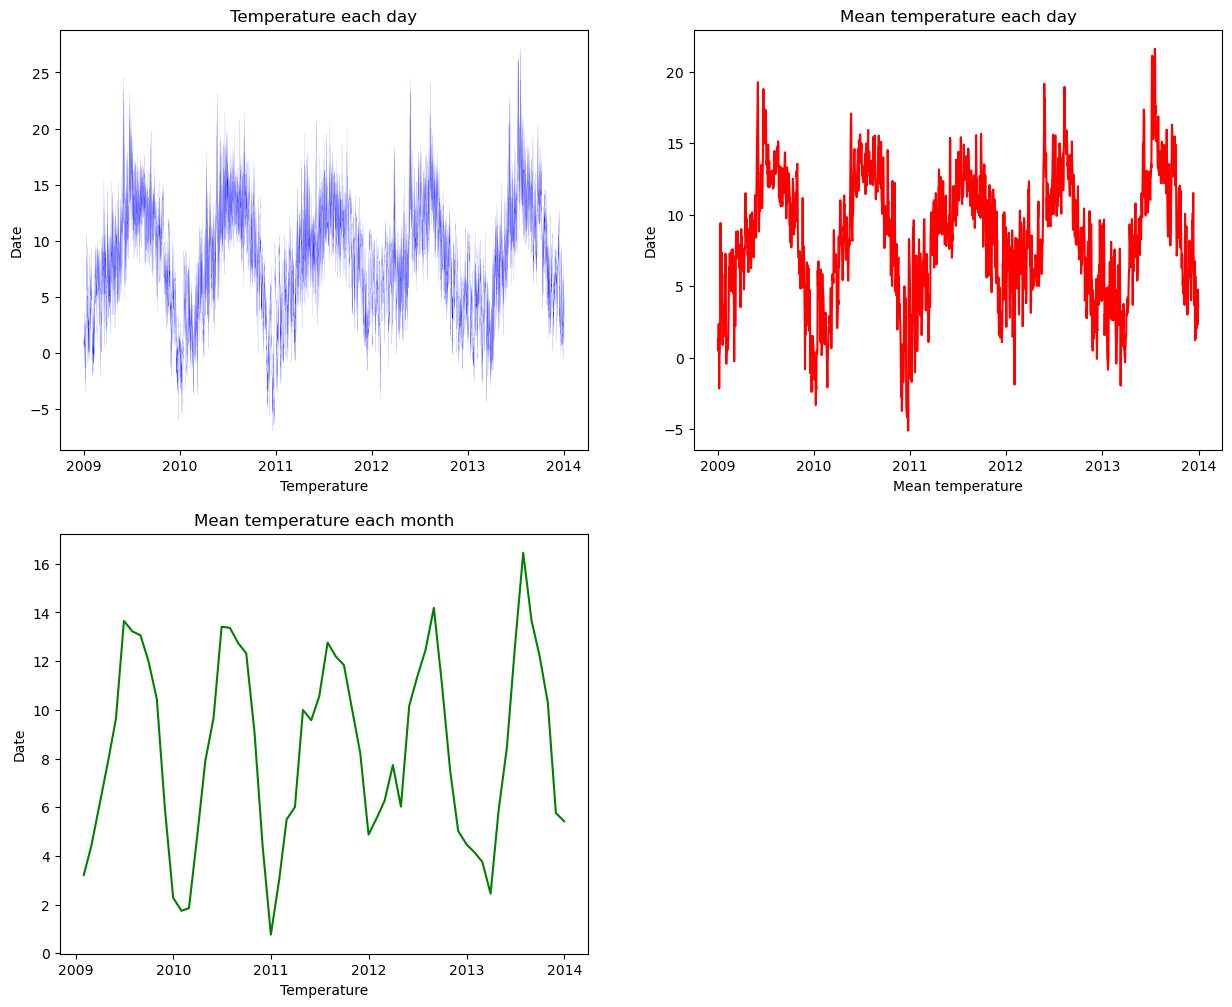

In [11]:
# referencing Wes McKinney's "Python for Data Analysis" 2nd edition, pages 281 - 317
# I create a figure containing three subplots
# one to plot the temperature data each day, the mean temperature each day, and then the mean temperature each month

fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

#temp = df['temp']
#date_time = df['date and time']
#time = df['time']

# creating the first plot - temperature data each day
ax1.plot(df_5_year['temp'], linestyle='-', color='blue', linewidth=0.05)
ax1.set_title('Temperature each day')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Date')

# creating the second plot - mean temperature each day
daily_mean = df_5_year['temp'].groupby(df_5_year.index.date).mean()
ax2.plot(daily_mean.index, daily_mean.values, linestyle='-', color='red')
ax2.set_title('Mean temperature each day')
ax2.set_xlabel('Mean temperature')
ax2.set_ylabel('Date')

# creating the third plot - mean temperature each month
# https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html
monthly_mean = df_5_year['temp'].groupby(pd.Grouper(freq='M')).mean()
ax3.plot(monthly_mean.index, monthly_mean.values, linestyle='-', color='green')
ax3.set_title('Mean temperature each month')
ax3.set_xlabel('Temperature')
ax3.set_ylabel('Date')

In [12]:
# creating a plot for wind speed each day
# first replacing any missing values with the mean wind speed
# converting all values in wdsp column to a numeric type due to errors I was getting when trying to calculate the mean
# converting blank entries to NaN using errors='coerce' argument (explained here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
# I decided to replace missing values with the mean rather than dropping them to avoid losing data (https://www.geeksforgeeks.org/python/replacing-missing-values-using-pandas-in-python/)
df_5_year['wdsp'] = pd.to_numeric(df_5_year['wdsp'], errors='coerce')
wdsp_mean = df_5_year['wdsp'].mean()
df_5_year['wdsp'].fillna(wdsp_mean, inplace=True)

C:\Users\fmtie\AppData\Local\Temp\ipykernel_31224\1634394929.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_year['wdsp'] = pd.to_numeric(df_5_year['wdsp'], errors='coerce')
C:\Users\fmtie\AppData\Local\Temp\ipykernel_31224\1634394929.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original obje

C:\Users\fmtie\AppData\Local\Temp\ipykernel_31224\3424481316.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max_wdsp = daily_max_wdsp.groupby(pd.Grouper(freq='M')).mean()


Text(0, 0.5, 'Mean of daily max wind speed')

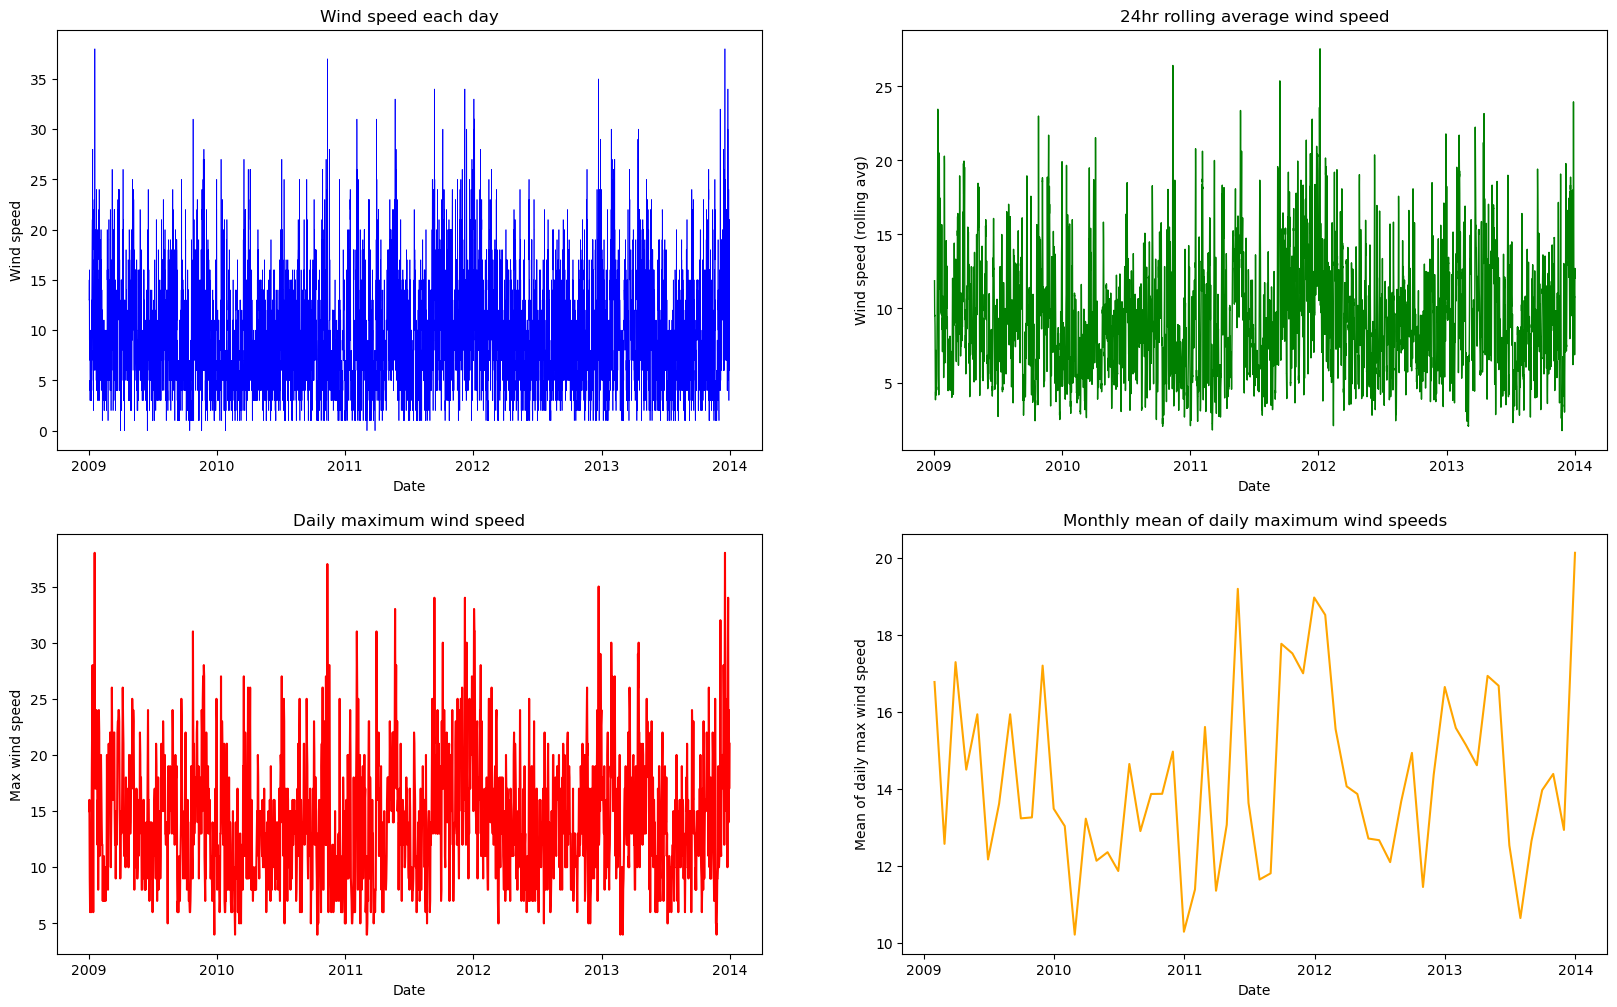

In [13]:
# calculating and plotting a 24-hour rolling average of wind speed (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)
# I use a window of 24 as the data is hourly i.e there are 24 data points for each date
rolling_wdsp = df_5_year['wdsp'].rolling(window=24).mean()

fig2 = plt.figure(figsize=(20, 12))

# plotting windspeed
ax4 = fig2.add_subplot(2, 2, 1)
ax4.plot(df_5_year['wdsp'], linestyle='-', color='blue', linewidth=0.5)
ax4.set_title('Wind speed each day')
ax4.set_xlabel('Date')
ax4.set_ylabel('Wind speed')

ax5 = fig2.add_subplot(2, 2, 2)
ax5.plot(rolling_wdsp, linestyle='-', color='green', linewidth=1)
ax5.set_title('24hr rolling average wind speed')
ax5.set_xlabel('Date')
ax5.set_ylabel('Wind speed (rolling avg)')

# now calclating the max wind speed for each day
daily_max_wdsp = df_5_year['wdsp'].groupby(df_5_year.index.date).max()
ax6 = fig2.add_subplot(2, 2, 3)
ax6.plot(daily_max_wdsp.index, daily_max_wdsp.values, linestyle='-', color='red')
ax6.set_title('Daily maximum wind speed')
ax6.set_xlabel('Date')
ax6.set_ylabel('Max wind speed')

# finally, plotting the monthly mean of the daily max wind speeds
daily_max_wdsp.index = pd.to_datetime(daily_max_wdsp.index)
daily_max_wdsp = pd.to_numeric(daily_max_wdsp, errors='coerce')
monthly_max_wdsp = daily_max_wdsp.groupby(pd.Grouper(freq='M')).mean()
ax7 = fig2.add_subplot(2, 2, 4)
ax7.plot(monthly_max_wdsp.index, monthly_max_wdsp.values, linestyle='-', color='orange')
ax7.set_title('Monthly mean of daily maximum wind speeds')
ax7.set_xlabel('Date')
ax7.set_ylabel('Mean of daily max wind speed')